In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./Mood Upliftment System (Responses) - Form Responses 1.csv', names=['Time', 'Mood', 'Link', 'Type'], skiprows=1)

In [3]:
df.head()

,Time,Mood,Link,Type
0,11/28/2022 18:28:19,Angry,https://youtu.be/dQw4w9WgXcQ,Music
1,11/28/2022 18:28:35,Neutral,https://youtu.be/dQw4w9WgXcQ,Music
2,11/28/2022 18:28:45,Surprised,https://youtu.be/dQw4w9WgXcQ,Music
3,11/28/2022 18:33:16,Fearful,https://youtu.be/YaEG2aWJnZ8,Music
4,11/28/2022 18:33:31,Sad,https://youtu.be/YaEG2aWJnZ8,Music


In [4]:
df.drop('Time', axis=1, inplace=True)

In [5]:
df.head()

,Mood,Link,Type
0,Angry,https://youtu.be/dQw4w9WgXcQ,Music
1,Neutral,https://youtu.be/dQw4w9WgXcQ,Music
2,Surprised,https://youtu.be/dQw4w9WgXcQ,Music
3,Fearful,https://youtu.be/YaEG2aWJnZ8,Music
4,Sad,https://youtu.be/YaEG2aWJnZ8,Music


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder_mood = LabelEncoder()
df['Mood'] = encoder_mood.fit_transform(df['Mood'])

In [8]:
encoder_type = LabelEncoder()
df['Type'] = encoder_type.fit_transform(df['Type'])

In [9]:
df.head()

,Mood,Link,Type
0,0,https://youtu.be/dQw4w9WgXcQ,4
1,3,https://youtu.be/dQw4w9WgXcQ,4
2,5,https://youtu.be/dQw4w9WgXcQ,4
3,2,https://youtu.be/YaEG2aWJnZ8,4
4,4,https://youtu.be/YaEG2aWJnZ8,4


In [10]:
df['Type'].value_counts()

4    65
1    21
3    18
2    13
0     6
Name: Type, dtype: int64

In [11]:
encoder_type.classes_

array(['Games', 'Jokes', 'Meditation', 'Motivation', 'Music'],
      dtype=object)

In [12]:
df.corr()

,Mood,Type
Mood,1.000000,0.007836
Type,0.007836,1.000000


In [13]:
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mood', ylabel='Type'>

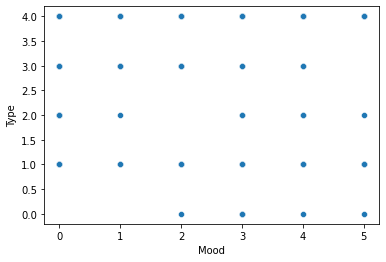

In [14]:
sns.scatterplot(df['Mood'], df['Type'])

In [28]:
encoder_mood.classes_

array(['Angry', 'Disgusted', 'Fearful', 'Neutral', 'Sad', 'Surprised'],
      dtype=object)

In [27]:
np.where('Sad'==encoder_mood.classes_)[0][0]

4

In [32]:
def fun(mood):
    mood = np.array(mood, ndmin=1)
    arr = np.array(['Angry', 'Disgusted', 'Fearful', 'Neutral', 'Sad', 'Surprised'])
    val = np.where(mood==arr)[0][0]
    return df[df['Mood'] == val].sample()['Link'].values[0]

In [33]:
for l in encoder_mood.classes_:
    print(f"{l}: {fun(l)}")

Angry: https://images.app.goo.gl/dscnN1ajuFaW9yKj7
Disgusted: https://images.app.goo.gl/5kYBRjFo4DJMmRGb7
Fearful: https://youtu.be/YaEG2aWJnZ8
Neutral: https://youtu.be/fG1oNm2tCro
Sad: https://youtu.be/5mFTXbZzOAE
Surprised: https://images.app.goo.gl/gSFEBVmFXnbn4DhS7


In [36]:
df.to_csv('Recommendations.csv', index=False)

In [37]:
pd.read_csv('./Recommendations.csv')

,Mood,Link,Type
0,0,https://youtu.be/dQw4w9WgXcQ,4
1,3,https://youtu.be/dQw4w9WgXcQ,4
2,5,https://youtu.be/dQw4w9WgXcQ,4
3,2,https://youtu.be/YaEG2aWJnZ8,4
4,4,https://youtu.be/YaEG2aWJnZ8,4
...,...,...,...
118,4,https://youtu.be/xCatIOFua2E,4
119,3,https://youtu.be/xCatIOFua2E,4
120,0,https://youtu.be/xCatIOFua2E,4
121,4,https://smashkarts.io/,0
